# Simple Linear Regression
Implementation from scratch

In [1]:
from statistics import mean
import numpy as np 
import matplotlib.pyplot as plt 
import random

#### Function for creating random dataset

In [2]:
def create_dataset(amount, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(amount):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        if correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]

    return np.array(xs), np.array(ys)

#### Getting Xs and ys from random dataset function

In [4]:
xs, ys = create_dataset(50, 30, correlation='pos')

#### Function for calculating slope(m) and y-intercept(b) as per the algorithm

In [5]:
def best_fit_slope_y_intercept(xs, ys):
    m = ( ( (mean(xs) * mean(ys)) - mean(xs * ys) ) /
          ( (mean(xs) * mean(xs)) - mean(xs * xs) ) )
    b = mean(ys) - m * mean(xs)
    return m, b

#### Getting the slope(m) and y-intercept(b)

In [7]:
m, b = best_fit_slope_y_intercept(xs, ys)

####  Getting the regression line by using all of the Xs to 'y = mx + c'

In [8]:
regression_line = [(m*x)+b for x in xs]

#### Predicting a value

In [11]:
x_predict = 55
y_predict = m*x_predict + b
print(y_predict)

113.4655172413793


#### Plotting the points and regression line

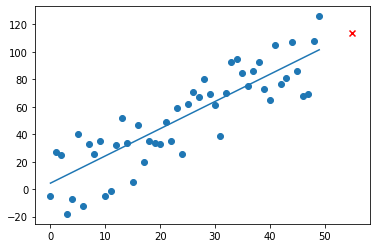

In [12]:
plt.scatter(xs, ys) # the points
plt.plot(xs, regression_line) # the regression line
plt.scatter(x_predict,y_predict, color='red', marker='x') # the prediction
plt.show()

***

### Calculating the accuracy

#### Function for calculating the sum of squared error

In [14]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

#### Function for calculating the r-squared theory

In [16]:
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    se_regression_line = squared_error(ys_orig, ys_line)
    se_mean_line = squared_error(ys_orig, y_mean_line)
    return (1 - (se_regression_line / se_mean_line))

#### Getting the accuracy

In [17]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.747851609664098
